## Define data

1. Mnemonics groups
2. Strings per BERT
3. Section 
4. Functions
5. Generic information
6. All per BERT

In [1]:
import pandas as pd

In [2]:
functions_data = "/home/sergio/Documents/TFM/repos/BinaryIntelligence/Models/DATA/functions.csv"
functions_vault = "data-vault/functions/"

strings_data = "/home/sergio/Documents/TFM/repos/BinaryIntelligence/Models/DATA/strings_256.csv"
strings_vault = "data-vault/strings_256"

generic_data = "/home/sergio/Documents/TFM/repos/BinaryIntelligence/Models/DATA/generic.csv"
generic_vault = "data-vault/generic"

entropy_data = "/home/sergio/Documents/TFM/repos/BinaryIntelligence/Models/DATA/entropy.csv"
entropy_vault = "data-vault/entropy"

mnemonics_data = "/home/sergio/Documents/TFM/repos/BinaryIntelligence/Models/DATA/groups.csv"
mnemonics_vault = "data-vault/mnemonics"

### Data to DF

In [3]:
df_functions = pd.read_csv(functions_data)
df_strings = pd.read_csv(strings_data)
df_entropy = pd.read_csv(entropy_data)
df_generics = pd.read_csv(generic_data)
df_mnemonics = pd.read_csv(mnemonics_data)

# Split data

In [4]:
from sklearn.model_selection import train_test_split

# Functions
X = df_functions.drop('Malware', axis=1)
y = df_functions['Malware']
X_train_functions, X_test_functions, y_train_functions, y_test_functions = train_test_split(X, y, test_size=0.2, random_state=42)

# Strings
X = df_strings.drop('Malware', axis=1)
y = df_strings['Malware']
X_train_strings, X_test_strings, y_train_strings, y_test_strings = train_test_split(X, y, test_size=0.2, random_state=42)

# Entropy
X = df_entropy.drop('Malware', axis=1)
y = df_entropy['Malware']
X_train_entropy, X_test_entropy, y_train_entropy, y_test_entropy = train_test_split(X, y, test_size=0.2, random_state=42)

# Generics
X = df_generics.drop('Malware', axis=1)
y = df_generics['Malware']
X_train_generics, X_test_generics, y_train_generics, y_test_generics = train_test_split(X, y, test_size=0.2, random_state=42)

# Mnemonics
X = df_mnemonics.drop('Malware', axis=1)
y = df_mnemonics['Malware']
X_train_mnemonics, X_test_mnemonics, y_train_mnemonics, y_test_mnemonics = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
del df_entropy, df_mnemonics, df_generics
del df_functions, df_strings

In [6]:
del X_train_entropy, y_train_entropy, X_train_generics, y_train_generics, X_train_mnemonics, y_train_mnemonics
del X_train_functions, y_train_functions, X_train_strings, y_train_strings

In [6]:
del X_test_entropy, y_test_entropy, X_test_generics, y_test_generics, X_test_mnemonics, y_test_mnemonics
del X_test_functions, y_test_functions, X_test_strings, y_test_strings

In [7]:
import gc
gc.collect()

0

# Train models

In [8]:
import pickle
import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [9]:
# Train functions
print("Training functions...")
functions_model = LGBMClassifier(n_estimators=12000, max_depth=100)
functions_model.fit(X_train_functions, y_train_functions)

with open(f"{functions_vault}/LGBM_best_model.pkl", 'wb') as f:
    try:
        pickle.dump(functions_model, f)
    except Exception as e:
        print("Error pickling functions: ", str(e))

# Train strings
print("Training strings...")
strings_model = LGBMClassifier(n_estimators=12000, max_depth=1000)
strings_model.fit(X_train_strings, y_train_strings)

with open(f"{strings_vault}/LGBM_best_model.pkl", 'wb') as f:
    try:
        pickle.dump(strings_model, f)
    except Exception as e:
        print("Error pickling strings: ", str(e))


# Train entropy
print("Training entropy...")
entropy_model = LGBMClassifier(n_estimators=12000, max_depth=1000)
entropy_model.fit(X_train_entropy, y_train_entropy)

with open(f"{entropy_vault}/LGBM_entropy.pkl", 'wb') as f:
    try:
        pickle.dump(entropy_model, f)
    except Exception as e:
        print("Error pickling entropy: ", str(e))


# Train mnemonics
print("Training mnemonics...")
mnemonics_model = LGBMClassifier(n_estimators=12000, max_depth=1000)
mnemonics_model.fit(X_train_mnemonics, y_train_mnemonics)

with open(f"{mnemonics_vault}/LGBM_mnemonics.pkl", 'wb') as f:
    try:
        pickle.dump(mnemonics_model, f)
    except Exception as e:
        print("Error pickling mnemonics: ", str(e))

# Train generic
print("Training generic...")
generic_model = ExtraTreesClassifier(n_estimators=50, max_depth=100)
generic_model.fit(X_train_generics, y_train_generics)

with open(f"{generic_vault}/Extra_generic.pkl", 'wb') as f:
    try:
        pickle.dump(generic_model, f)
    except Exception as e:
        print("Error pickling generic: ", str(e))

Training generic...


# Test models

In [24]:
import pickle
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score
)
import pandas as pd

model_names = ["LGBM_functions", "LGBM_entropy", "LGBM_generic", "LGBM_strings", "LGBM_mnemonics"]
X_tests = [X_test_functions, X_test_entropy, X_test_generics, X_test_strings, X_test_mnemonics]
y_tests = [y_test_functions, y_test_entropy, y_test_generics, y_test_strings, y_test_mnemonics]

cols = [(mn.split("_")[-1]).capitalize() for mn in model_names]
metrics_table = pd.DataFrame(columns=["Precision", "Recall", "F1-score", "Accuracy"], index=cols)

for i in range(len(model_names)):
    model_name = model_names[i]
    X_test = X_tests[i]
    y_test = y_tests[i]

    with open(f"data-vault/all-models/{model_name}.pkl", 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(X_test)

    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    accuracy = round(accuracy_score(y_test, y_pred), 3)

    metrics_table.loc[model_name.split("_")[-1].capitalize()] = [precision, recall, f1, accuracy]

# Here we use pandas styling options to make the table look nicer
styled_table = metrics_table.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background', '#606060'), 
                    ('color', 'white'),
                    ('font-family', 'verdana')]
    },
    {
        'selector': 'td',
        'props': [('font-family', 'verdana')]
    }]
).background_gradient(cmap='Blues')

display(styled_table)

with open('stats.tex', 'w') as tf:
    tf.write(metrics_table.to_latex())

,Precision,Recall,F1-score,Accuracy
Functions,0.923000,0.990000,0.955000,0.954000
Entropy,0.989000,0.990000,0.990000,0.990000
Generic,0.991000,0.990000,0.991000,0.991000
Strings,0.987000,0.955000,0.971000,0.971000
Mnemonics,0.965000,0.965000,0.965000,0.965000


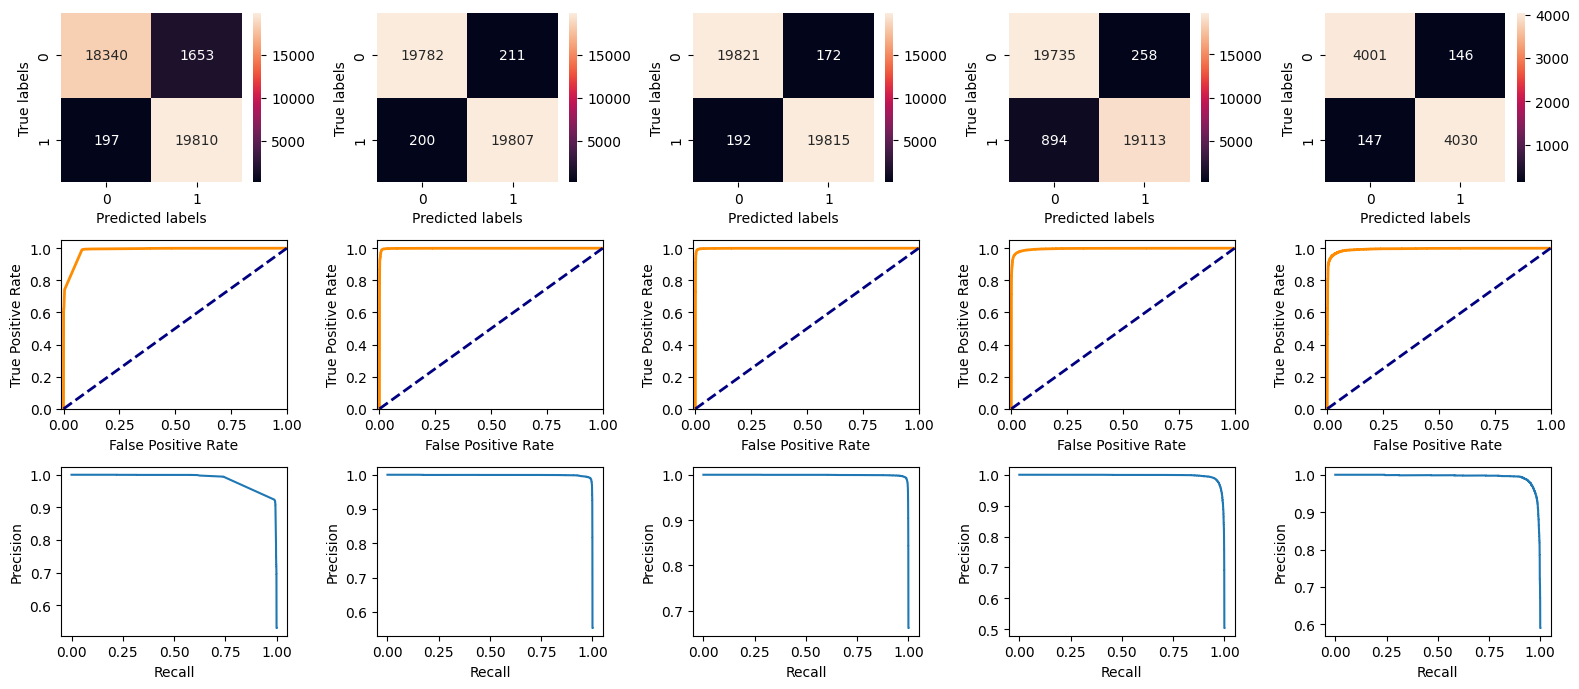

Metrics:
            Model  Precision    Recall  F1-score  Accuracy   ROC AUC
0  LGBM_functions   0.922984  0.990153  0.955389  0.953750  0.953737
1    LGBM_entropy   0.989459  0.990003  0.989731  0.989725  0.989725
2    LGBM_generic   0.991394  0.990403  0.990899  0.990900  0.990900
3    LGBM_strings   0.986681  0.955316  0.970745  0.971200  0.971206
4  LGBM_mnemonics   0.965038  0.964807  0.964923  0.964801  0.964801


In [19]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import seaborn as sns
import pandas as pd

model_names = ["LGBM_functions", "LGBM_entropy", "LGBM_generic", "LGBM_strings", "LGBM_mnemonics"]
X_tests = [X_test_functions, X_test_entropy, X_test_generics, X_test_strings, X_test_mnemonics]
y_tests = [y_test_functions, y_test_entropy, y_test_generics, y_test_strings, y_test_mnemonics]

fig, axs = plt.subplots(3, len(model_names), figsize=(16, 7))
axs = axs.ravel()

metrics_table = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1-score", "Accuracy", "ROC AUC"])

for i in range(len(model_names)):
    model_name = model_names[i]
    X_test = X_tests[i]
    y_test = y_tests[i]

    with open(f"data-vault/all-models/{model_name}.pkl", 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    metrics_table.loc[i] = [model_name, precision, recall, f1, accuracy, roc_auc]

    sns.heatmap(confusion, annot=True, fmt='g', ax=axs[i])
    axs[i].set_xlabel('Predicted labels')
    axs[i].set_ylabel('True labels')

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    axs[i + len(model_names)].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[i + len(model_names)].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[i + len(model_names)].set_xlim([-0.01, 1.0])
    axs[i + len(model_names)].set_ylim([0.0, 1.05])
    axs[i + len(model_names)].set_xlabel('False Positive Rate')
    axs[i + len(model_names)].set_ylabel('True Positive Rate')

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    axs[i + 2 * len(model_names)].plot(recall, precision, label='Precision-Recall curve')
    axs[i + 2 * len(model_names)].set_xlabel('Recall')
    axs[i + 2 * len(model_names)].set_ylabel('Precision')

fig.tight_layout()

plt.show()

print("Metrics:")
print(metrics_table)

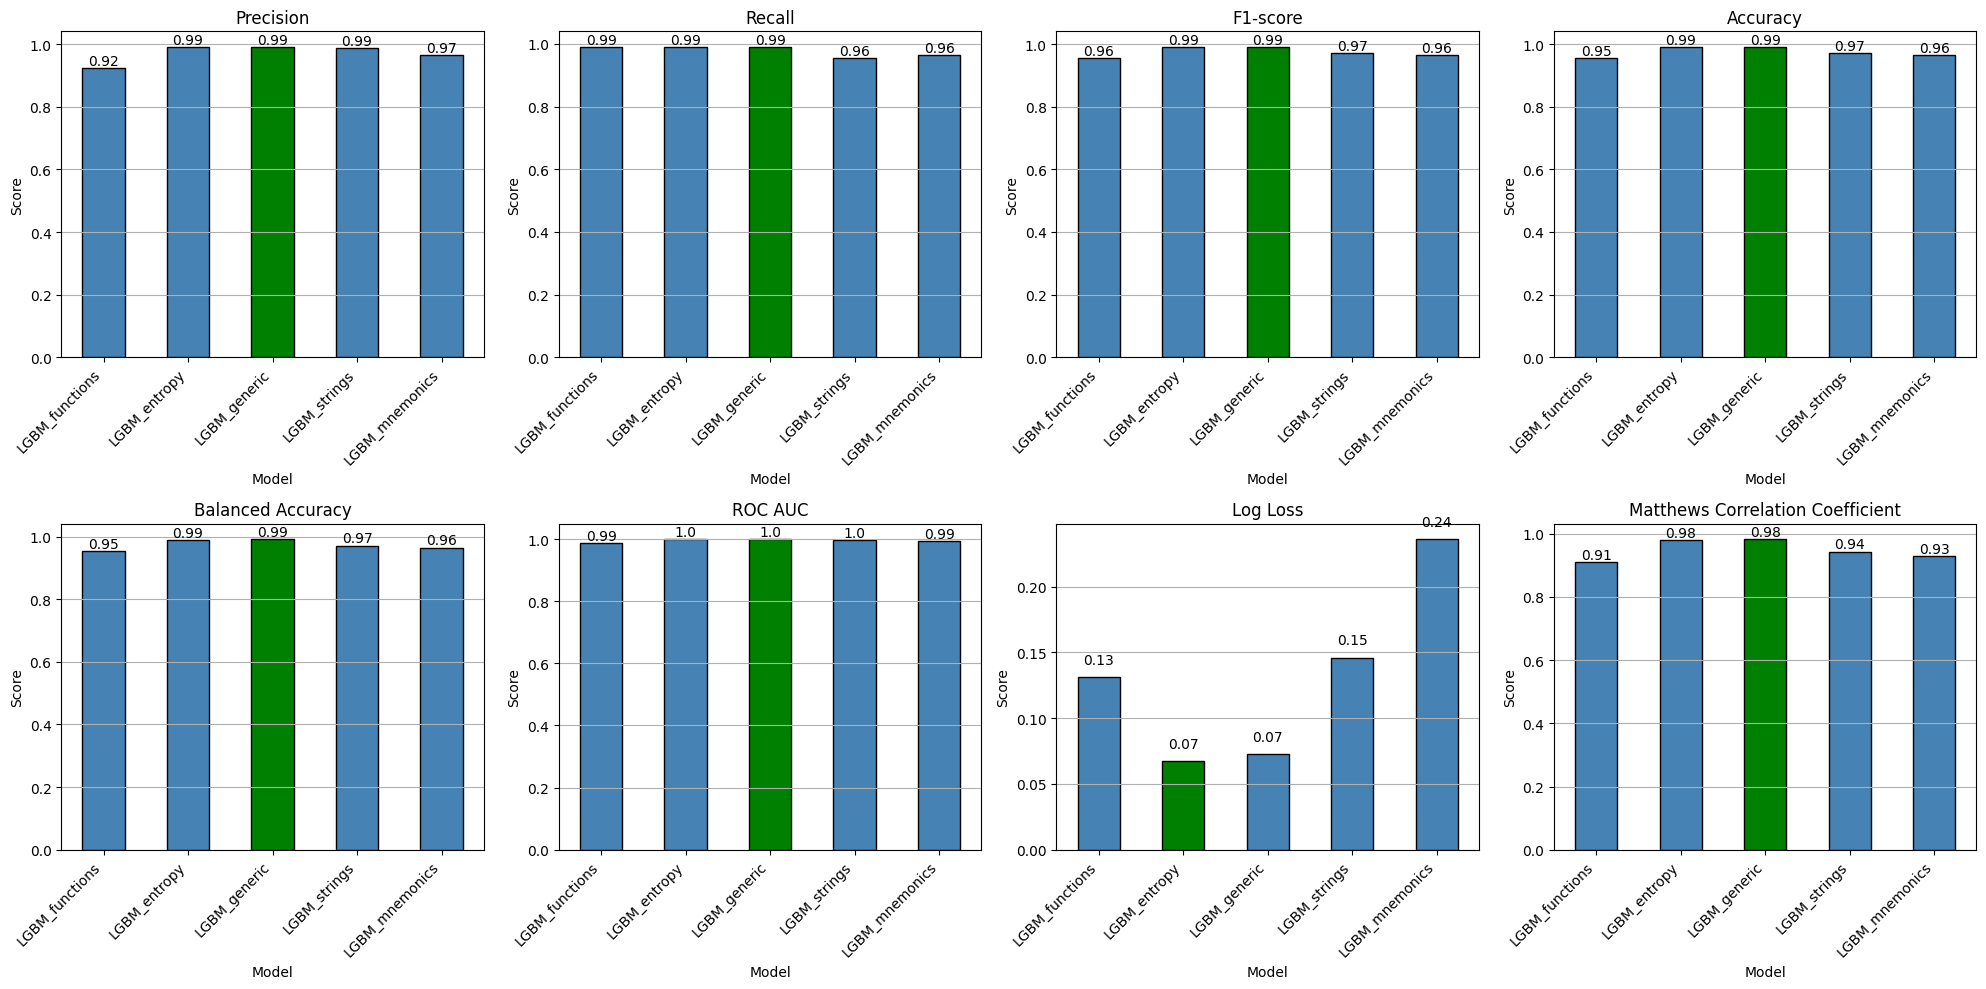

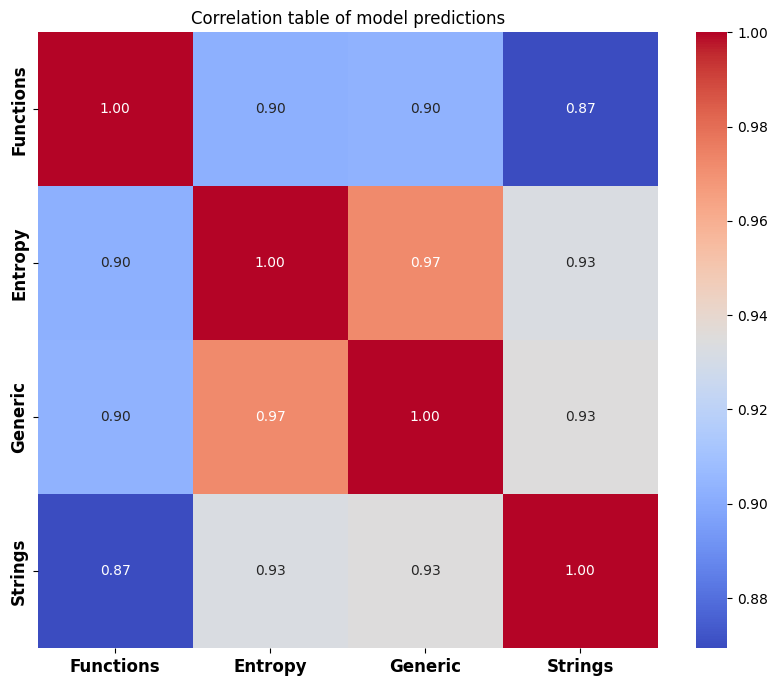

           functions   entropy   generic   strings
functions   1.000000  0.902402  0.903167  0.869359
entropy     0.902402  1.000000  0.971951  0.932740
generic     0.903167  0.971951  1.000000  0.934842
strings     0.869359  0.932740  0.934842  1.000000


In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, balanced_accuracy_score,
    log_loss, matthews_corrcoef
)
import numpy as np
import seaborn as sns
from matplotlib.font_manager import FontProperties

metrics_dict = {
    "Model": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "Accuracy": [],
    "Balanced Accuracy": [],
    "ROC AUC": [],
    "Log Loss": [],
    "Matthews Correlation Coefficient": [],
}

model_names = ["LGBM_functions", "LGBM_entropy", "LGBM_generic", "LGBM_strings", "LGBM_mnemonics"]
X_tests = [X_test_functions, X_test_entropy, X_test_generics, X_test_strings, X_test_mnemonics]
y_tests = [y_test_functions, y_test_entropy, y_test_generics, y_test_strings, y_test_mnemonics]

model_predictions = {}

for i in range(len(model_names)):
    model_name = model_names[i]
    X_test = X_tests[i]
    y_test = y_tests[i]

    with open(f"data-vault/all-models/{model_name}.pkl", 'rb') as f:
        model = pickle.load(f)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    if model_name != "LGBM_mnemonics":
        model_predictions[model_name.split("_")[-1]] = y_pred.tolist()

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    logloss = log_loss(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)

    metrics_dict["Model"].append(model_name)
    metrics_dict["Precision"].append(precision)
    metrics_dict["Recall"].append(recall)
    metrics_dict["F1-score"].append(f1)
    metrics_dict["Accuracy"].append(accuracy)
    metrics_dict["Balanced Accuracy"].append(balanced_accuracy)
    metrics_dict["ROC AUC"].append(roc_auc)
    metrics_dict["Log Loss"].append(logloss)
    metrics_dict["Matthews Correlation Coefficient"].append(mcc)

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.set_index("Model", inplace=True)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(metrics_df.columns):
    if column == "Log Loss":
        best_model_index = np.argmin(metrics_df[column])
        colors = ["steelblue" if (x > min(metrics_df[column])) else "darkorange" for x in metrics_df[column]]
    else:
        best_model_index = np.argmax(metrics_df[column])
        colors = ["steelblue" if (x < max(metrics_df[column])) else "darkorange" for x in metrics_df[column]]

    metrics_df[column].plot(kind='bar', ax=axs[i], color=colors, edgecolor='black')
    axs[i].set_title(column)
    axs[i].set_xticklabels(metrics_df.index, rotation=45, ha='right')
    axs[i].set_ylabel('Score')
    axs[i].grid(axis='y')

    for j, v in enumerate(metrics_df[column]):
        axs[i].text(j, v + 0.01, round(v, 2), color='black', ha='center')

    axs[i].patches[best_model_index].set_facecolor('green')

plt.tight_layout()
plt.show()

df_predictions = pd.DataFrame(model_predictions)

correlation_matrix = df_predictions.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax)

plt.title("Correlation table of model predictions")

ticks_font = FontProperties(weight='bold', size=12)

xtick_labels = [label.capitalize() for label in correlation_matrix.columns]
ytick_labels = [label.capitalize() for label in correlation_matrix.columns]

plt.xticks(np.arange(correlation_matrix.shape[1]) + 0.5, xtick_labels, rotation=0, ha='center')
plt.yticks(np.arange(correlation_matrix.shape[0]) + 0.5, ytick_labels, rotation=90, va='center')

for tick in ax.get_xticklabels():
    tick.set_fontproperties(ticks_font)

for tick in ax.get_yticklabels():
    tick.set_fontproperties(ticks_font)

plt.show()

print(correlation_matrix)